<a href="https://colab.research.google.com/github/mosheber/neuralStudy/blob/master/visualize_ct_dicom_data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<h1><center><font size="6">Visualize CT DICOM Data</font></center></h1>


# <a id='0'>Content</a>

- <a href='#1'>Introduction</a>  
- <a href='#2'>Load packages</a>  
- <a href='#3'>Read the data</a> 
    - <a href='#31'>Read overview data</a> 
    - <a href='#32'>Read TIFF data</a> 
    - <a href='#33'>Read DICOM data</a>  
- <a href='#4'>Data exploration</a>
    - <a href='#41'>Check data consistency</a> 
    - <a href='#42'>Show TIFF images</a> 
    - <a href='#43'>Show DICOM data</a> 
- <a href='#5'>Conclusions</a>
- <a href='#6'>References</a>

# <a id="1">Introduction</a>

## Overview  

The dataset is designed to allow for different methods to be tested for examining the trends in CT image data associated with using contrast and patient age. The basic idea is to identify image textures, statistical patterns and features correlating strongly with these traits and possibly build simple tools for automatically classifying these images when they have been misclassified (or finding outliers which could be suspicious cases, bad measurements, or poorly calibrated machines)

## Data
The data are a tiny subset of images from the cancer imaging archive. They consist of the middle slice of all CT images taken where valid age, modality, and contrast tags could be found.   TCIA Archive Link - [https://wiki.cancerimagingarchive.net/display/Public/TCGA-LUAD](https://wiki.cancerimagingarchive.net/display/Public/TCGA-LUAD)     
The images data is provided both in DICOM and TIFF formats. The images data files are named with a naming convention allowing us to identify some meta-data about the images.



## DICOM format

**Digital Imaging and Communications in Medicine** (**DICOM**) is the accepted standard for the communication and management of medical imaging information.  **DICOM** is used for archiving and transmitting medical images. It enables the integration of medical imaging devices (radiological scanners), servers, network hardware and **Picture Archiving and Communication Systems** (**PACS**). The standard was widely adopted by hospitals and research centers and is steadly advancing as well toward small practice and cliniques.     



<a href="#0"><font size="1" color="red">Go to top</font></a>


# <a id="2">Load packages</a>

We will load the packages for showing tiff images and dicom data.   

For dicom data, we are loading the **dicom** package.   


In [1]:
import os
os.environ['KAGGLE_USERNAME'] = "moshpit" # username from the json file
os.environ['KAGGLE_KEY'] = "8f5ffdcaecf800f502b124cadffbafdd" # key from the json file
!kaggle datasets download -d kmader/siim-medical-images # api copied from kaggle

 90% 226M/250M [00:03<00:00, 51.2MB/s]
100% 250M/250M [00:03<00:00, 83.9MB/s]


In [2]:
!unzip siim-medical-images.zip

Archive:  siim-medical-images.zip
  inflating: dicom_dir/ID_0000_AGE_0060_CONTRAST_1_CT.dcm  
  inflating: dicom_dir/ID_0001_AGE_0069_CONTRAST_1_CT.dcm  
  inflating: dicom_dir/ID_0002_AGE_0074_CONTRAST_1_CT.dcm  
  inflating: dicom_dir/ID_0003_AGE_0075_CONTRAST_1_CT.dcm  
  inflating: dicom_dir/ID_0004_AGE_0056_CONTRAST_1_CT.dcm  
  inflating: dicom_dir/ID_0005_AGE_0048_CONTRAST_1_CT.dcm  
  inflating: dicom_dir/ID_0006_AGE_0075_CONTRAST_1_CT.dcm  
  inflating: dicom_dir/ID_0007_AGE_0061_CONTRAST_1_CT.dcm  
  inflating: dicom_dir/ID_0008_AGE_0051_CONTRAST_1_CT.dcm  
  inflating: dicom_dir/ID_0009_AGE_0048_CONTRAST_1_CT.dcm  
  inflating: dicom_dir/ID_0010_AGE_0060_CONTRAST_1_CT.dcm  
  inflating: dicom_dir/ID_0011_AGE_0061_CONTRAST_1_CT.dcm  
  inflating: dicom_dir/ID_0012_AGE_0061_CONTRAST_1_CT.dcm  
  inflating: dicom_dir/ID_0013_AGE_0060_CONTRAST_1_CT.dcm  
  inflating: dicom_dir/ID_0014_AGE_0071_CONTRAST_1_CT.dcm  
  inflating: dicom_dir/ID_0015_AGE_0061_CONTRAST_1_CT.dcm  
  infl

In [3]:
!pip install dicom

     |████████████████████████████████| 768kB 4.5MB/s 


In [4]:
IS_LOCAL = False
import numpy as np
import pandas as pd
from skimage.io import imread
import seaborn as sns
import matplotlib.pyplot as plt
from glob import glob
if(IS_LOCAL):
    import pydicom as dicom
else:
    import dicom
import os

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm
/usr/local/lib/python3.6/dist-packages/dicom/__init__.py:53: UserWarning: 
This code is using an older version of pydicom, which is no longer 
maintained as of Jan 2017.  You can access the new pydicom features and API 
by installing `pydicom` from PyPI.
See 'Transitioning to pydicom 1.x' section at pydicom.readthedocs.org 
for more information.

  warnings.warn(msg)


Parameters setting and files list.

In [5]:
PATH='.'
print(os.listdir(PATH))

['.config', 'full_archive.npz', 'overview.csv', 'siim-medical-images.zip', 'dicom_dir', 'tiff_images', 'sample_data']



<a href="#0"><font size="1" color="red">Go to top</font></a>


# <a id="3">Read the data</a>


## <a id="31">Read overview data</a>

In [6]:
data_df = pd.read_csv(os.path.join(PATH,"overview.csv"))

In [7]:
print("CT Medical images -  rows:",data_df.shape[0]," columns:", data_df.shape[1])

CT Medical images -  rows: 100  columns: 8


In [8]:
data_df.head()

,Unnamed: 0,Age,Contrast,ContrastTag,raw_input_path,id,tiff_name,dicom_name
0,0,60,True,NONE,../data/50_50_dicom_cases\Contrast\00001 (1).dcm,0,ID_0000_AGE_0060_CONTRAST_1_CT.tif,ID_0000_AGE_0060_CONTRAST_1_CT.dcm
1,1,69,True,NONE,../data/50_50_dicom_cases\Contrast\00001 (10).dcm,1,ID_0001_AGE_0069_CONTRAST_1_CT.tif,ID_0001_AGE_0069_CONTRAST_1_CT.dcm
2,2,74,True,APPLIED,../data/50_50_dicom_cases\Contrast\00001 (11).dcm,2,ID_0002_AGE_0074_CONTRAST_1_CT.tif,ID_0002_AGE_0074_CONTRAST_1_CT.dcm
3,3,75,True,NONE,../data/50_50_dicom_cases\Contrast\00001 (12).dcm,3,ID_0003_AGE_0075_CONTRAST_1_CT.tif,ID_0003_AGE_0075_CONTRAST_1_CT.dcm
4,4,56,True,NONE,../data/50_50_dicom_cases\Contrast\00001 (13).dcm,4,ID_0004_AGE_0056_CONTRAST_1_CT.tif,ID_0004_AGE_0056_CONTRAST_1_CT.dcm


## <a id="32">Read TIFF data</a>  


In [9]:
print("Number of TIFF images:", len(os.listdir(os.path.join(PATH,"tiff_images"))))

Number of TIFF images: 100


In [10]:
tiff_data = pd.DataFrame([{'path': filepath} for filepath in glob('tiff_images/*.tif')])

### Process TIFF data   

We define a function to process data.   
We extract file, ID, age, contrast, modality information from path info.

In [11]:
def tiff_metadata(row):
  splits = row['file'].split('_')
  return {
      'ID':str(splits[1]),
      'Age':int(splits[3]),
      'Contrast':bool(int(splits[5])),
      'Modality':str(splits[6].split('.')[-2]),
  }

def process_data(path):
    data = pd.DataFrame([{'path': filepath} for filepath in glob(path)])
    data['file'] = data['path'].map(os.path.basename)
    data['tiff_metadata'] = data.apply(tiff_metadata,axis=1)
    metadata = pd.DataFrame(list(data['tiff_metadata']))
    data['ID'] = metadata['ID']
    data['Age'] = metadata['Age']
    data['Contrast'] = metadata['Contrast']
    data['Modality'] = metadata['Modality']
    return data

In [12]:
tiff_data = process_data('tiff_images/*.tif')

### Check TIFF data

Let's check the TIFF data, after we extracted the meta info from the file name.

In [13]:
tiff_data.head(10)

,path,file,tiff_metadata,ID,Age,Contrast,Modality
0,tiff_images/ID_0007_AGE_0061_CONTRAST_1_CT.tif,ID_0007_AGE_0061_CONTRAST_1_CT.tif,"{'ID': '0007', 'Age': 61, 'Contrast': True, 'M...",0007,61,True,CT
1,tiff_images/ID_0013_AGE_0060_CONTRAST_1_CT.tif,ID_0013_AGE_0060_CONTRAST_1_CT.tif,"{'ID': '0013', 'Age': 60, 'Contrast': True, 'M...",0013,60,True,CT
2,tiff_images/ID_0035_AGE_0059_CONTRAST_1_CT.tif,ID_0035_AGE_0059_CONTRAST_1_CT.tif,"{'ID': '0035', 'Age': 59, 'Contrast': True, 'M...",0035,59,True,CT
3,tiff_images/ID_0029_AGE_0078_CONTRAST_1_CT.tif,ID_0029_AGE_0078_CONTRAST_1_CT.tif,"{'ID': '0029', 'Age': 78, 'Contrast': True, 'M...",0029,78,True,CT
4,tiff_images/ID_0016_AGE_0063_CONTRAST_1_CT.tif,ID_0016_AGE_0063_CONTRAST_1_CT.tif,"{'ID': '0016', 'Age': 63, 'Contrast': True, 'M...",0016,63,True,CT
5,tiff_images/ID_0043_AGE_0069_CONTRAST_1_CT.tif,ID_0043_AGE_0069_CONTRAST_1_CT.tif,"{'ID': '0043', 'Age': 69, 'Contrast': True, 'M...",0043,69,True,CT
6,tiff_images/ID_0078_AGE_0066_CONTRAST_0_CT.tif,ID_0078_AGE_0066_CONTRAST_0_CT.tif,"{'ID': '0078', 'Age': 66, 'Contrast': False, '...",0078,66,False,CT
7,tiff_images/ID_0060_AGE_0080_CONTRAST_0_CT.tif,ID_0060_AGE_0080_CONTRAST_0_CT.tif,"{'ID': '0060', 'Age': 80, 'Contrast': False, '...",0060,80,False,CT
8,tiff_images/ID_0041_AGE_0045_CONTRAST_1_CT.tif,ID_0041_AGE_0045_CONTRAST_1_CT.tif,"{'ID': '0041', 'Age': 45, 'Contrast': True, 'M...",0041,45,True,CT
9,tiff_images/ID_0004_AGE_0056_CONTRAST_1_CT.tif,ID_0004_AGE_0056_CONTRAST_1_CT.tif,"{'ID': '0004', 'Age': 56, 'Contrast': True, 'M...",0004,56,True,CT



<a href="#0"><font size="1" color="red">Go to top</font></a>


## <a id="33">Read DICOM data</a>


We repeat the same processing for the **DICOM** data.

In [15]:
!pwd
PATH = '/content/'

/content


In [16]:
print("Number of DICOM files:", len(os.listdir(PATH+"dicom_dir")))

Number of DICOM files: 100


### Process DICOM data

In [17]:
dicom_data = process_data('dicom_dir/*.dcm')

### Check DICOM data

In [18]:
dicom_data.head(10)

,path,file,tiff_metadata,ID,Age,Contrast,Modality
0,dicom_dir/ID_0040_AGE_0069_CONTRAST_1_CT.dcm,ID_0040_AGE_0069_CONTRAST_1_CT.dcm,"{'ID': '0040', 'Age': 69, 'Contrast': True, 'M...",0040,69,True,CT
1,dicom_dir/ID_0056_AGE_0083_CONTRAST_0_CT.dcm,ID_0056_AGE_0083_CONTRAST_0_CT.dcm,"{'ID': '0056', 'Age': 83, 'Contrast': False, '...",0056,83,False,CT
2,dicom_dir/ID_0075_AGE_0080_CONTRAST_0_CT.dcm,ID_0075_AGE_0080_CONTRAST_0_CT.dcm,"{'ID': '0075', 'Age': 80, 'Contrast': False, '...",0075,80,False,CT
3,dicom_dir/ID_0097_AGE_0060_CONTRAST_0_CT.dcm,ID_0097_AGE_0060_CONTRAST_0_CT.dcm,"{'ID': '0097', 'Age': 60, 'Contrast': False, '...",0097,60,False,CT
4,dicom_dir/ID_0003_AGE_0075_CONTRAST_1_CT.dcm,ID_0003_AGE_0075_CONTRAST_1_CT.dcm,"{'ID': '0003', 'Age': 75, 'Contrast': True, 'M...",0003,75,True,CT
5,dicom_dir/ID_0001_AGE_0069_CONTRAST_1_CT.dcm,ID_0001_AGE_0069_CONTRAST_1_CT.dcm,"{'ID': '0001', 'Age': 69, 'Contrast': True, 'M...",0001,69,True,CT
6,dicom_dir/ID_0078_AGE_0066_CONTRAST_0_CT.dcm,ID_0078_AGE_0066_CONTRAST_0_CT.dcm,"{'ID': '0078', 'Age': 66, 'Contrast': False, '...",0078,66,False,CT
7,dicom_dir/ID_0076_AGE_0068_CONTRAST_0_CT.dcm,ID_0076_AGE_0068_CONTRAST_0_CT.dcm,"{'ID': '0076', 'Age': 68, 'Contrast': False, '...",0076,68,False,CT
8,dicom_dir/ID_0090_AGE_0067_CONTRAST_0_CT.dcm,ID_0090_AGE_0067_CONTRAST_0_CT.dcm,"{'ID': '0090', 'Age': 67, 'Contrast': False, '...",0090,67,False,CT
9,dicom_dir/ID_0047_AGE_0069_CONTRAST_1_CT.dcm,ID_0047_AGE_0069_CONTRAST_1_CT.dcm,"{'ID': '0047', 'Age': 69, 'Contrast': True, 'M...",0047,69,True,CT



<a href="#0"><font size="1" color="red">Go to top</font></a>  


# <a id="4">Data exploration</a>

## <a id="41">Check data consistency</a>

Let's verify if the content in overview.csv is consistent with the data in tiff_images folder.

In [19]:
def countplot_comparison(feature):
    fig, (ax1, ax2, ax3) = plt.subplots(1,3, figsize = (16, 4))
    s1 = sns.countplot(data_df[feature], ax=ax1)
    s1.set_title("Overview data")
    s2 = sns.countplot(tiff_data[feature], ax=ax2)
    s2.set_title("Tiff files data")
    s3 = sns.countplot(dicom_data[feature], ax=ax3)
    s3.set_title("Dicom files data")
    plt.show()

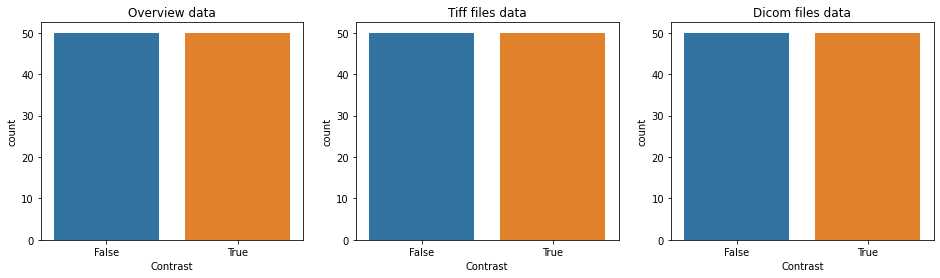

In [20]:
countplot_comparison('Contrast')

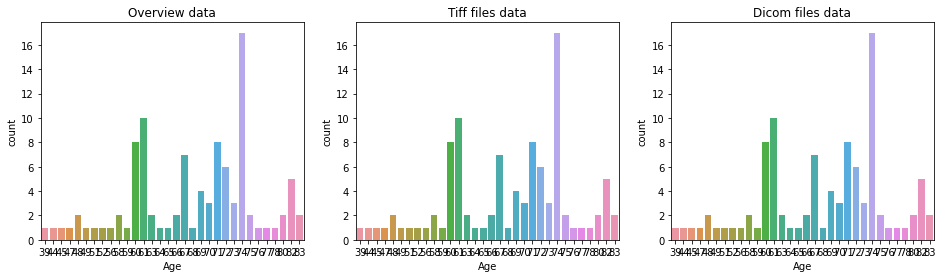

In [21]:
countplot_comparison('Age')

The values in the 3 data sources are consistent.   



<a href="#0"><font size="1" color="red">Go to top</font></a>

## <a id="42">Show TIFF images</a>

We will show a subsample of 16 images from the total of 100 images.     
We will select the first 16 images from the data set.   
We will use grayscale.   
We define here a generic function to represent both TIFF images and DICOM images.
For each file format we use a different processing.

In [22]:
def show_images(data, dim=16, imtype='TIFF'):
    img_data = list(data[:dim].T.to_dict().values())
    f, ax = plt.subplots(4,4, figsize=(16,20))

    def do_tiff(data_row,i,ax):
      data_row_img = imread(data_row['path'])
      ax[i//4, i%4].matshow(data_row_img,cmap='gray')

    def do_dicom(data_row,i,ax):
      data_row_img = dicom.read_file(data_row['path'])
      ax[i//4, i%4].imshow(data_row_img.pixel_array, cmap=plt.cm.bone)

    cases = {
        'TIFF': do_tiff,
        'DICOM': do_dicom
    }
    for i,data_row in enumerate(img_data):
        cases[imtype](data_row,i,ax)
        ax[i//4, i%4].axis('off')
        ax[i//4, i%4].set_title('Modality: {Modality} Age: {Age}\nSlice: {ID} Contrast: {Contrast}'.format(**data_row))
    plt.show()
    return img_data


We apply the function to show TIFF images.

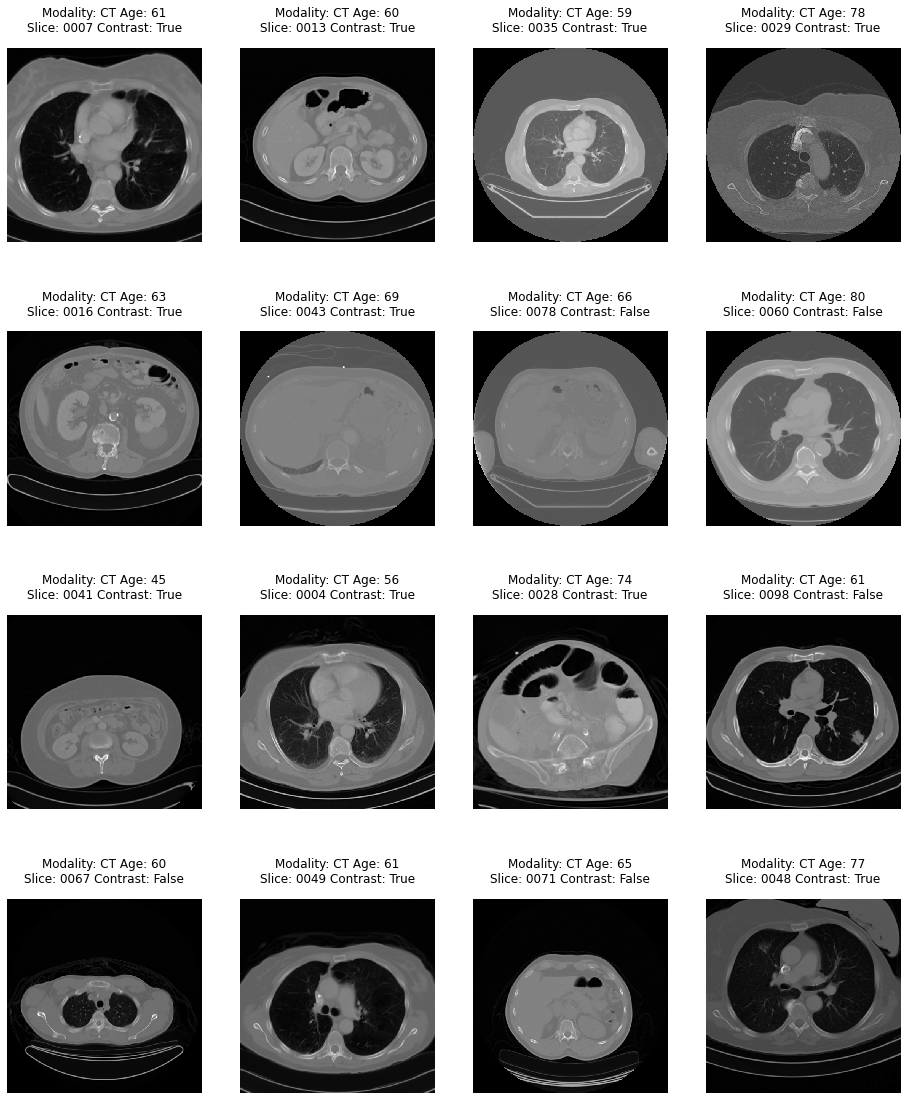

In [23]:
img_data = show_images(tiff_data,16,'TIFF')


<a href="#0"><font size="1" color="red">Go to top</font></a>


## <a id="43">Show DICOM data</a>

We will show a subsample of 16 images from the total of 100 images.   
We will use grayscale.   
Ideally, if the **DICOM** images would be a set of slices from a single examen, they could be aggregated using a function like the one shown here: extract_voxel_data - which read the **DICOM** slices (each in a separate file) and aggregate the image data in a **3D voxel tensor**. This will not be the case here, because we are storing slices from different patients and exams (one slice / exam / patient).

The following code snapshot shows how tipically a DICOM 2D image subset is used to create a 3D scene.

>     # extract voxel data  
>     def extract_voxel_data(list_of_dicom_files):  
>         datasets = [dicom.read_file(f) for f in list_of_dicom_files]  
>          try:  
>              voxel_ndarray, ijk_to_xyz = dicom_numpy.combine_slices(datasets)  
>          except dicom_numpy.DicomImportException as e:  
>          # invalid DICOM data  
>              raise  
>          return voxel_ndarray  

Here we show a subset of 16 images.

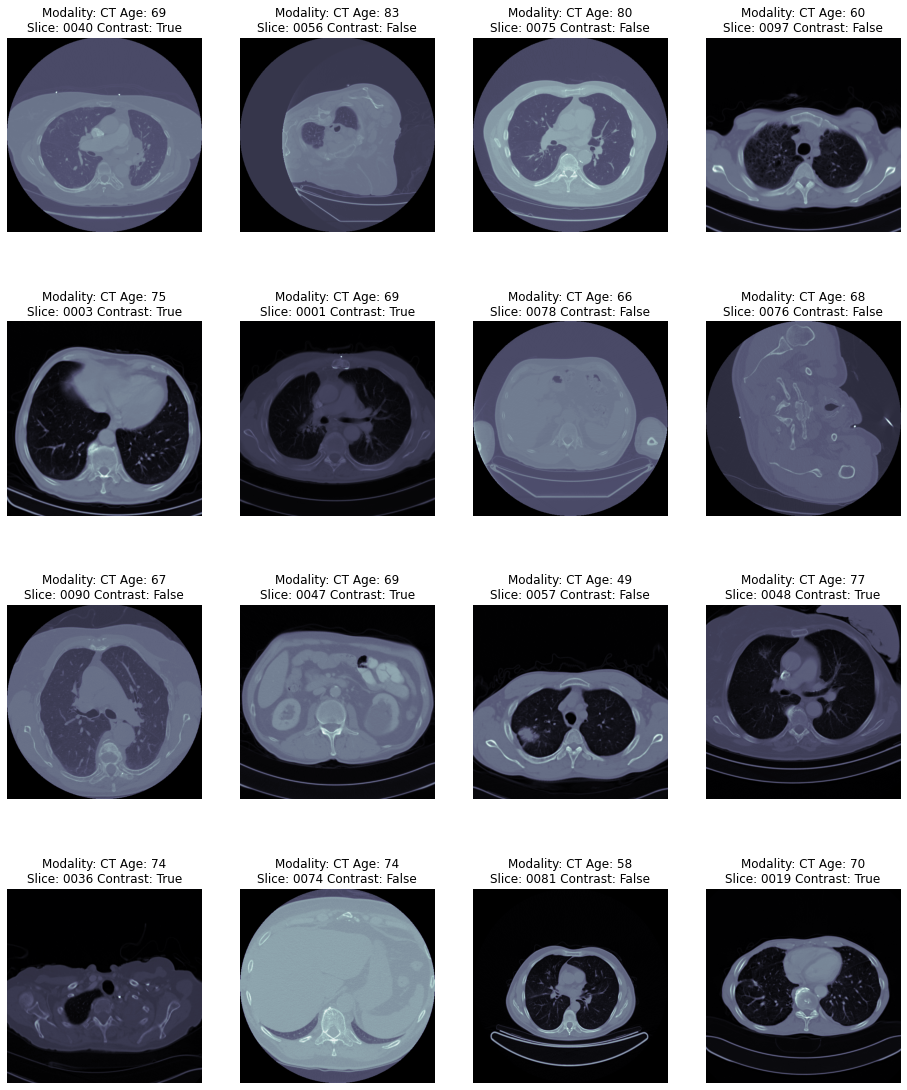

In [24]:
dicom_img_data = show_images(dicom_data,16,'DICOM')

In [25]:
dicom_img_data

[{'Age': 69,
  'Contrast': True,
  'ID': '0040',
  'Modality': 'CT',
  'file': 'ID_0040_AGE_0069_CONTRAST_1_CT.dcm',
  'path': 'dicom_dir/ID_0040_AGE_0069_CONTRAST_1_CT.dcm',
  'tiff_metadata': {'Age': 69,
   'Contrast': True,
   'ID': '0040',
   'Modality': 'CT'}},
 {'Age': 83,
  'Contrast': False,
  'ID': '0056',
  'Modality': 'CT',
  'file': 'ID_0056_AGE_0083_CONTRAST_0_CT.dcm',
  'path': 'dicom_dir/ID_0056_AGE_0083_CONTRAST_0_CT.dcm',
  'tiff_metadata': {'Age': 83,
   'Contrast': False,
   'ID': '0056',
   'Modality': 'CT'}},
 {'Age': 80,
  'Contrast': False,
  'ID': '0075',
  'Modality': 'CT',
  'file': 'ID_0075_AGE_0080_CONTRAST_0_CT.dcm',
  'path': 'dicom_dir/ID_0075_AGE_0080_CONTRAST_0_CT.dcm',
  'tiff_metadata': {'Age': 80,
   'Contrast': False,
   'ID': '0075',
   'Modality': 'CT'}},
 {'Age': 60,
  'Contrast': False,
  'ID': '0097',
  'Modality': 'CT',
  'file': 'ID_0097_AGE_0060_CONTRAST_0_CT.dcm',
  'path': 'dicom_dir/ID_0097_AGE_0060_CONTRAST_0_CT.dcm',
  'tiff_metadata': 

### More about DICOM data

A DICOM file containing much more information than the image itself that we represented. Let's glimpse, for one of the DICOM files, this information. We will read the first dicom file only and show this information.  
We use **dicom** package.

In [26]:
dicom_file_path = list(dicom_data[:1].T.to_dict().values())[0]['path']
dicom_file_dataset = dicom.read_file(dicom_file_path)
dicom_file_dataset

(0008, 0005) Specific Character Set              CS: 'ISO_IR 100'
(0008, 0008) Image Type                          CS: ['ORIGINAL', 'PRIMARY', 'AXIAL']
(0008, 0012) Instance Creation Date              DA: '20020218'
(0008, 0013) Instance Creation Time              TM: '203731'
(0008, 0016) SOP Class UID                       UI: CT Image Storage
(0008, 0018) SOP Instance UID                    UI: 1.3.6.1.4.1.14519.5.2.1.8421.9002.335911346417709746493931913450
(0008, 0020) Study Date                          DA: '20020218'
(0008, 0021) Series Date                         DA: '20020218'
(0008, 0022) Acquisition Date                    DA: '20020218'
(0008, 0023) Content Date                        DA: '20020218'
(0008, 0030) Study Time                          TM: '203224.000000'
(0008, 0031) Series Time                         TM: '203435'
(0008, 0032) Acquisition Time                    TM: '203622'
(0008, 0033) Content Time                        TM: '203731'
(0008, 0050) Accession 

We can extract various fields from the DICOM FileDataset. Here are few examples:  
* Modality  
* Manufacturer
* Patient Age  
* Patient Sex
* Patient Name  
* Patient ID



In [27]:
print("Modality: {}\nManufacturer: {}\nPatient Age: {}\nPatient Sex: {}\nPatient Name: {}\nPatient ID: {}".format(
    dicom_file_dataset.Modality, 
    dicom_file_dataset.Manufacturer,
    dicom_file_dataset.PatientAge,
    dicom_file_dataset.PatientSex,
    dicom_file_dataset.PatientName,
    dicom_file_dataset.PatientID))

Modality: CT
Manufacturer: GE MEDICAL SYSTEMS
Patient Age: 069Y
Patient Sex: F
Patient Name: TCGA-38-6178
Patient ID: TCGA-38-6178


Some of the information are anonymized (like Name and ID), which is common standard for public medical data.   

We will modify the visualization function, to show parameters from the DICOM data instead of the parameters extracted from the image name.  



In [28]:
def show_dicom_images(data):
    img_data = list(data[:16].T.to_dict().values())
    f, ax = plt.subplots(4,4, figsize=(16,20))
    for i,data_row in enumerate(img_data):

        data_row_img = dicom.read_file(data_row['path'])
        modality = data_row_img.Modality
        age = int(data_row_img.PatientAge.replace('Y',''))
        
        ax[i//4, i%4].imshow(data_row_img.pixel_array, cmap=plt.cm.bone) 
        ax[i//4, i%4].axis('off')
        ax[i//4, i%4].set_title('Modality: {} Age: {}\nSlice: {} Contrast: {}'.format(
         modality, age, data_row['ID'], data_row['Contrast']))
    plt.show()


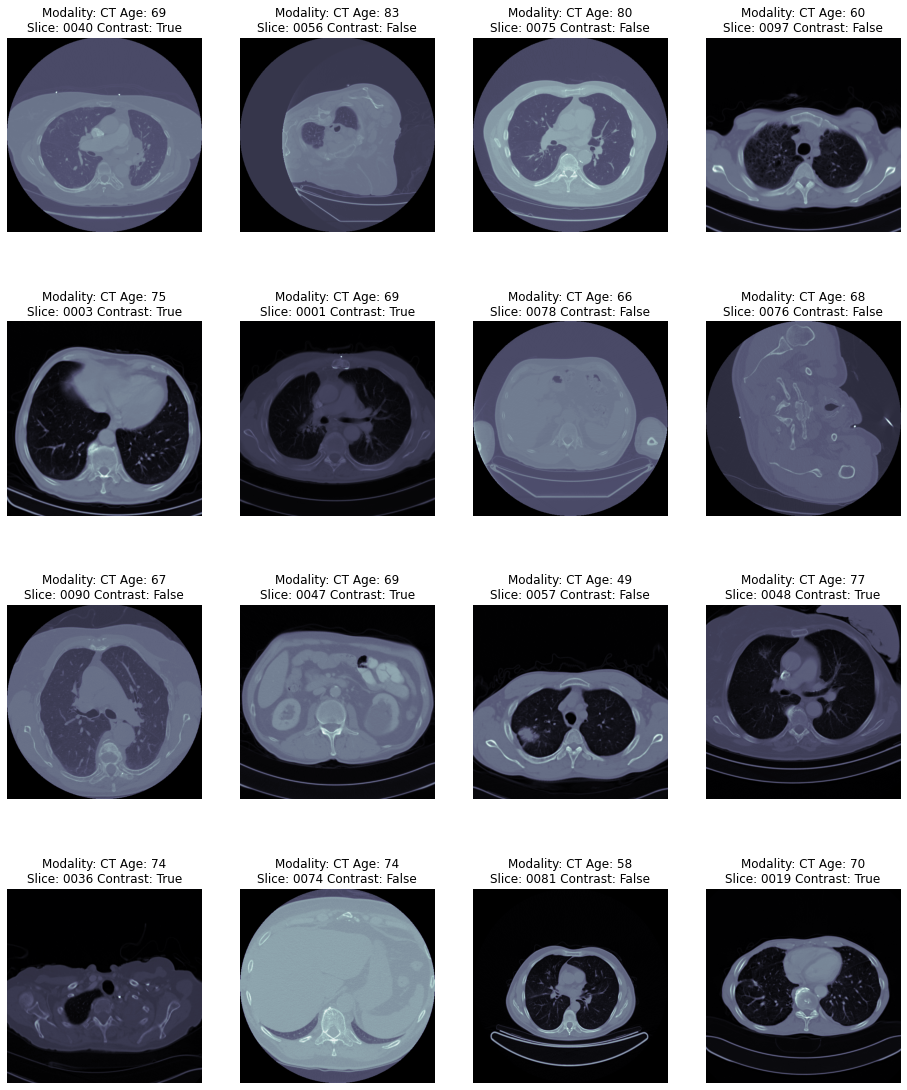

In [29]:
show_dicom_images(dicom_data)

# <a id="5">Conclusion</a>

We demonstrated how we can load and show **TIFF** images.   
As well, using **dicom** and **dicom-numpy** packages, we demonstrated how to read and visualize **DICOM** data.   
We also explored preliminary the content of a **DICOM** data file and modified the visualization function to use (partially) **DICOM** data for the image attributes.  


<a href="#0"><font size="1" color="red">Go to top</font></a>


# <a id="6">References</a>

[1] <a href="https://www.kaggle.com/kmader">Kevin Mader</a>,  <a href="https://www.kaggle.com/kmader/show-the-data-in-the-zip-file">Show the data in the Zip File</a>    
[2] <a href="https://www.kaggle.com/byrachonok">Vitaly Byrachonok</a>,  <a href="https://www.kaggle.com/byrachonok/study-ct-medical-images">Study CT Medical Images</a>    
[3] Python package for processing DICOM data, dicom-numpy, https://dicom-numpy.readthedocs.io     
[4] Viewing DICOM images in Python, https://pydicom.github.io/pydicom/stable/viewing_images.html     
[5] DICOM format, https://en.wikipedia.org/wiki/DICOM    



<a href="#0"><font size="1" color="red">Go to top</font></a>




Image VAE

In [71]:
from tensorflow.keras import layers as l
from tensorflow.keras import backend as K
from tensorflow.keras.models import Model
import numpy as np

def get_autoencoder(width,height,depth):
  filters = (32,64)
  latentDim=16

  inputShape = (height, width, depth)
  chanDim = -1

  inputs = l.Input(shape = inputShape)
  x = inputs

  for f in filters:
    x = l.Conv2D(f,(3,3),strides=2,padding='same')(x)
    x = l.LeakyReLU(alpha=0.2)(x)
    x = l.BatchNormalization(axis=chanDim)(x)

  volumeSize =  K.int_shape(x)
  x = l.Flatten()(x)
  latent = l.Dense(latentDim)(x)

  encoder = Model(inputs,latent, name='encoder')

  ######################

  latentInputs = l.Input(shape=(latentDim,))
  x = l.Dense(np.prod(volumeSize[1:]))(latentInputs)
  x = l.Reshape((volumeSize[1],volumeSize[2],volumeSize[3]))(x)

  for f in filters[::-1]:
    x = l.Conv2DTranspose(f,(3,3),strides=2,padding='same')(x)
    x = l.LeakyReLU(alpha=0.2)(x)
    x = l.BatchNormalization(axis=chanDim)(x)

  ########################
  x = l.Conv2DTranspose(depth,(3,3),padding='same')(x)
  outputs = l.Activation('sigmoid')(x)
  decoder = Model(latentInputs, outputs, name = 'decoder')
  autoencoder = Model(inputs, decoder(encoder(inputs)),name='autoencoder')
  autoencoder.summary()
  return encoder, decoder, autoencoder

Image to Matrix

In [72]:
import tensorflow as tf

In [73]:
tf.config.experimental.list_physical_devices('GPU') 


[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]

In [74]:
 tf.debugging.set_log_device_placement(True)

In [75]:
row = dicom_data.iloc[0]

In [76]:
data_row_img = dicom.read_file(row['path'])

In [77]:
from tensorflow.keras.utils import Sequence

In [78]:
class DicomGen(Sequence):
  def __init__(self,dicom_df,shuffle=True,batch_size = 50):
    self.dicom_df = dicom_df     
    self.shuffle = shuffle
    self.batch_size = batch_size
    self.on_epoch_end()


  def on_epoch_end(self):
    if(self.shuffle):
      self.dicom_df = self.dicom_df.sample(len(self.dicom_df))
    batch_count = len(self.dicom_df) // self.batch_size
    print('batch_count: {}'.format(batch_count))
    self.dicom_df['batch'] = [x % batch_count for x in range(len(self.dicom_df))]

  def __len__(self):
    return len(self.dicom_df) // self.batch_size
  
  def __getitem__(self,index):
    print('index: {}'.format(index))
    batch = self.dicom_df[self.dicom_df['batch']==index].index
    print('batch: {}'.format(batch))
    X,X = self.__get_data(batch)
    return X,X

  def __get_data(self,batch):
    imgs = []
    df = self.dicom_df.iloc[batch]
    for i,row in df.iterrows():
      data_row_img = dicom.read_file(row['path'])
      imgs.append(np.expand_dims(data_row_img.pixel_array,axis=-1))
    X = np.array(imgs)
    return X,X
  
  def get_data_public(self,batch):
    return  self.__get_data(batch)

In [79]:
encoder, decoder, auto = get_autoencoder(512,512,1)
opt = tf.keras.optimizers.Adam(lr=1e-3)
auto.compile(loss='mse',optimizer=opt)

Executing op RandomUniform in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op Sub in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op Mul in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op Add in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op VarHandleOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op VarIsInitializedOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op LogicalNot in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op Assert in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op AssignVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op Fill in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op VarHandleOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op VarIsInitializedOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op LogicalNot in device /job:localhost/replica

In [80]:
gen = DicomGen(dicom_data)

batch_count: 2


In [81]:
h = auto.fit_generator(
    gen, 
    epochs=10, 
    verbose=1, 
    #callbacks=None, 
    #validation_data=None, 
    #validation_steps=None, 
    #validation_freq=1, 
    #class_weight=None, 
    #max_queue_size=10, 
    #workers=1, 
    #use_multiprocessing=False, 
    shuffle=True, 
    initial_epoch=0
)

Executing op ReadVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op Identity in device /job:localhost/replica:0/task:0/device:GPU:0
index: 0
batch: Int64Index([62, 79, 42, 45, 51, 12, 23, 98,  8,  5,  1, 85, 46, 38,  7, 24, 57,
            90, 52, 48, 99, 36, 55, 40, 74, 27, 67, 43,  4, 77, 65, 29, 89, 61,
             9, 15, 28, 19,  3, 44, 75, 66, 56, 60, 97, 64, 88, 14, 84, 49],
           dtype='int64')
Executing op TensorDataset in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op FlatMapDataset in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op PrefetchDataset in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op ReadVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op Identity in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op AssignVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op OptimizeDataset in device /job:localhost/replica:0/tas

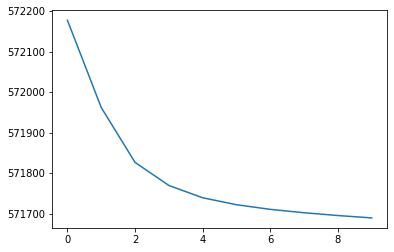

In [82]:
import matplotlib.pyplot as plt
plt.plot(range(len(h.history['loss'])),h.history['loss'])
plt.show()

In [93]:
X = gen.get_data_public(list(range(len(gen.dicom_df))))

In [94]:
from tqdm import tqdm

In [99]:
all_pred = encoder.predict(X[0])

Executing op RangeDataset in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op RepeatDataset in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op MapDataset in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op PrefetchDataset in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op FlatMapDataset in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op TensorDataset in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op RepeatDataset in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op ZipDataset in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op ParallelMapDatasetV2 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op AssignVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op ModelDataset in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op AnonymousIteratorV2 in device /job:localhost/replica:0/task:0/device:CPU:0
Execu

In [100]:
all_pred.shape

(100, 16)

In [101]:
!nvidia-smi

Wed Aug 12 17:27:47 2020       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 450.57       Driver Version: 418.67       CUDA Version: 10.1     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla T4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   77C    P0    34W /  70W |  14575MiB / 15079MiB |      0%      Default |
|                               |                      |                 ERR! |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [102]:
!apt install libopenblas-base libomp-dev

Reading package lists... Done
Building dependency tree       
Reading state information... Done
libopenblas-base is already the newest version (0.2.20+ds-4).
libopenblas-base set to manually installed.
The following package was automatically installed and is no longer required:
  libnvidia-common-440
Use 'apt autoremove' to remove it.
Suggested packages:
  libomp-doc
The following NEW packages will be installed:
  libomp-dev libomp5
0 upgraded, 2 newly installed, 0 to remove and 35 not upgraded.
Need to get 239 kB of archives.
After this operation, 804 kB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu bionic/universe amd64 libomp5 amd64 5.0.1-1 [234 kB]
Get:2 http://archive.ubuntu.com/ubuntu bionic/universe amd64 libomp-dev amd64 5.0.1-1 [5,088 B]
Fetched 239 kB in 1s (223 kB/s)
Selecting previously unselected package libomp5:amd64.
(Reading database ... 144487 files and directories currently installed.)
Preparing to unpack .../libomp5_5.0.1-1_amd64.deb .

In [107]:
# # Install RAPIDS
# !git clone https://github.com/rapidsai/rapidsai-csp-utils.git
# !bash rapidsai-csp-utils/colab/rapids-colab.sh stable

# import sys, os

# dist_package_index = sys.path.index('/usr/local/lib/python3.6/dist-packages')
# sys.path = sys.path[:dist_package_index] + ['/usr/local/lib/python3.6/site-packages'] + sys.path[dist_package_index:]
# sys.path
# exec(open('rapidsai-csp-utils/colab/update_modules.py').read(), globals())

In [108]:
from sklearn.manifold import TSNE

In [109]:
t = TSNE()

In [110]:
%%time
x_t  = t.fit_transform(all_pred)

CPU times: user 805 ms, sys: 9.36 ms, total: 815 ms
Wall time: 437 ms


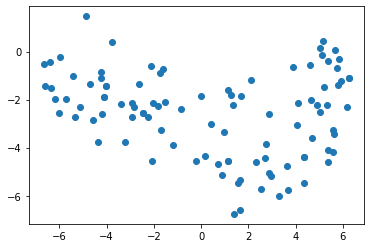

In [113]:
from google.colab import drive
drive.mount('/content/gdrive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/gdrive


In [115]:
# !cd "gdrive/My Drive" && mkdir ct_dicom_stne

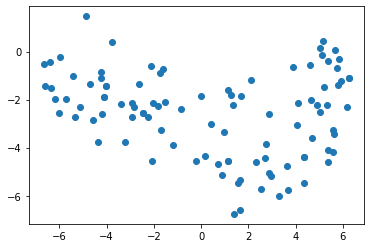

In [116]:
plt.scatter(x=x_t[:,0],y=x_t[:,1])
plt.savefig('gdrive/My Drive/ct_dicom_stne/base_net_10_epoch.png')